In [8]:
# Import modules
from sklearn import tree
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Perfect Data Set

In [9]:
# Read CSV
data_df = pd.read_csv('Data\Perfect_AviationData.csv') 

# Display DF
data_df

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20081126X30503,Accident,WPR09LA046,11/25/2008,"Monterey, CA",United States,36.586944,-121.842777,MRY,Monterey Peninsula Airport,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,Probable Cause
1,20081024X13647,Accident,CEN09LA034,10/24/2008,"Breckenridge, TX",United States,32.718889,-98.891111,BKD,Stephens County,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,Probable Cause
2,20081020X12359,Accident,CEN09LA024,10/19/2008,"Angleton, TX",United States,29.248889,-95.328056,KLBX,Brazoria County Airport,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,Probable Cause
3,20081011X02304,Accident,WPR09LA009,10/10/2008,"Placerville, CA",United States,38.724167,-120.753333,PVF,Placerville Airport,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,Probable Cause
4,20081006X90954,Accident,WPR09LA004,10/5/2008,"Sandy Valley, NV",United States,35.795000,-115.627223,3L2,Sky Ranch Airport,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,20070806X01122,Accident,NYC07LA134,6/8/2007,"Gallatin, TN",United States,36.406667,-86.358889,M33,Sumner County,...,1.0,Reciprocating,Business,0.0,2.0,2.0,0.0,VMC,DESCENT,Probable Cause
119,20070614X00729,Accident,MIA07LA102,5/27/2007,"Hayden, AL",United States,33.925278,-86.870000,NONE,Private,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,LANDING,Probable Cause
120,20070624X00785,Accident,NYC07LA125,5/23/2007,"Leesburg, VA",United States,39.063611,-77.636666,JYO,Leesburg Municipal Airport,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,CRUISE,Probable Cause
121,20070508X00524,Accident,LAX07FA150,5/3/2007,"Dillon, MT",United States,45.253333,-112.548889,DLN,Dillon,...,2.0,Turbo Jet,Personal,2.0,0.0,0.0,0.0,VMC,APPROACH,Probable Cause


In [10]:
# Define target (Also called as Y)
target = data_df["Investigation_Type"]
# target_plo
target.head()

0    Accident
1    Accident
2    Accident
3    Accident
4    Accident
Name: Investigation_Type, dtype: object

##### Quick Look at Data

(array([120.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

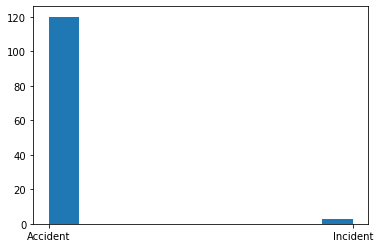

In [5]:
plt.hist(target)

In [11]:
#  Encode Target values for Random Forest Model

## Get the unique list of Investigation_type
unique_target = list(data_df["Investigation_Type"].unique())

# Create an encoder and fit on unique values
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(unique_target)

# Transform all target values with encoder and store as list
ecoded_target_list = list(target_encoder.transform(target))

# Create a final_target with encoded values
encoded_target_df = pd.DataFrame({"Investigation_Type" : ecoded_target_list})
final_target = encoded_target_df["Investigation_Type"]
final_target

0      0
1      0
2      0
3      0
4      0
      ..
118    0
119    0
120    0
121    0
122    0
Name: Investigation_Type, Length: 123, dtype: int64

In [12]:
# Getting the data
data_df = data_df.drop("Investigation_Type", axis=1)
data_df

,Event_Id,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Injury_Severity,...,Number_of_Engines,Engine_Type,Purpose_of_Flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_of_Flight,Report_Status
0,20081126X30503,WPR09LA046,11/25/2008,"Monterey, CA",United States,36.586944,-121.842777,MRY,Monterey Peninsula Airport,Non-Fatal,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,Probable Cause
1,20081024X13647,CEN09LA034,10/24/2008,"Breckenridge, TX",United States,32.718889,-98.891111,BKD,Stephens County,Non-Fatal,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,Probable Cause
2,20081020X12359,CEN09LA024,10/19/2008,"Angleton, TX",United States,29.248889,-95.328056,KLBX,Brazoria County Airport,Non-Fatal,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,Probable Cause
3,20081011X02304,WPR09LA009,10/10/2008,"Placerville, CA",United States,38.724167,-120.753333,PVF,Placerville Airport,Non-Fatal,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,Probable Cause
4,20081006X90954,WPR09LA004,10/5/2008,"Sandy Valley, NV",United States,35.795000,-115.627223,3L2,Sky Ranch Airport,Fatal,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,20070806X01122,NYC07LA134,6/8/2007,"Gallatin, TN",United States,36.406667,-86.358889,M33,Sumner County,Non-Fatal,...,1.0,Reciprocating,Business,0.0,2.0,2.0,0.0,VMC,DESCENT,Probable Cause
119,20070614X00729,MIA07LA102,5/27/2007,"Hayden, AL",United States,33.925278,-86.870000,NONE,Private,Fatal,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,LANDING,Probable Cause
120,20070624X00785,NYC07LA125,5/23/2007,"Leesburg, VA",United States,39.063611,-77.636666,JYO,Leesburg Municipal Airport,Non-Fatal,...,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,VMC,CRUISE,Probable Cause
121,20070508X00524,LAX07FA150,5/3/2007,"Dillon, MT",United States,45.253333,-112.548889,DLN,Dillon,Fatal,...,2.0,Turbo Jet,Personal,2.0,0.0,0.0,0.0,VMC,APPROACH,Probable Cause


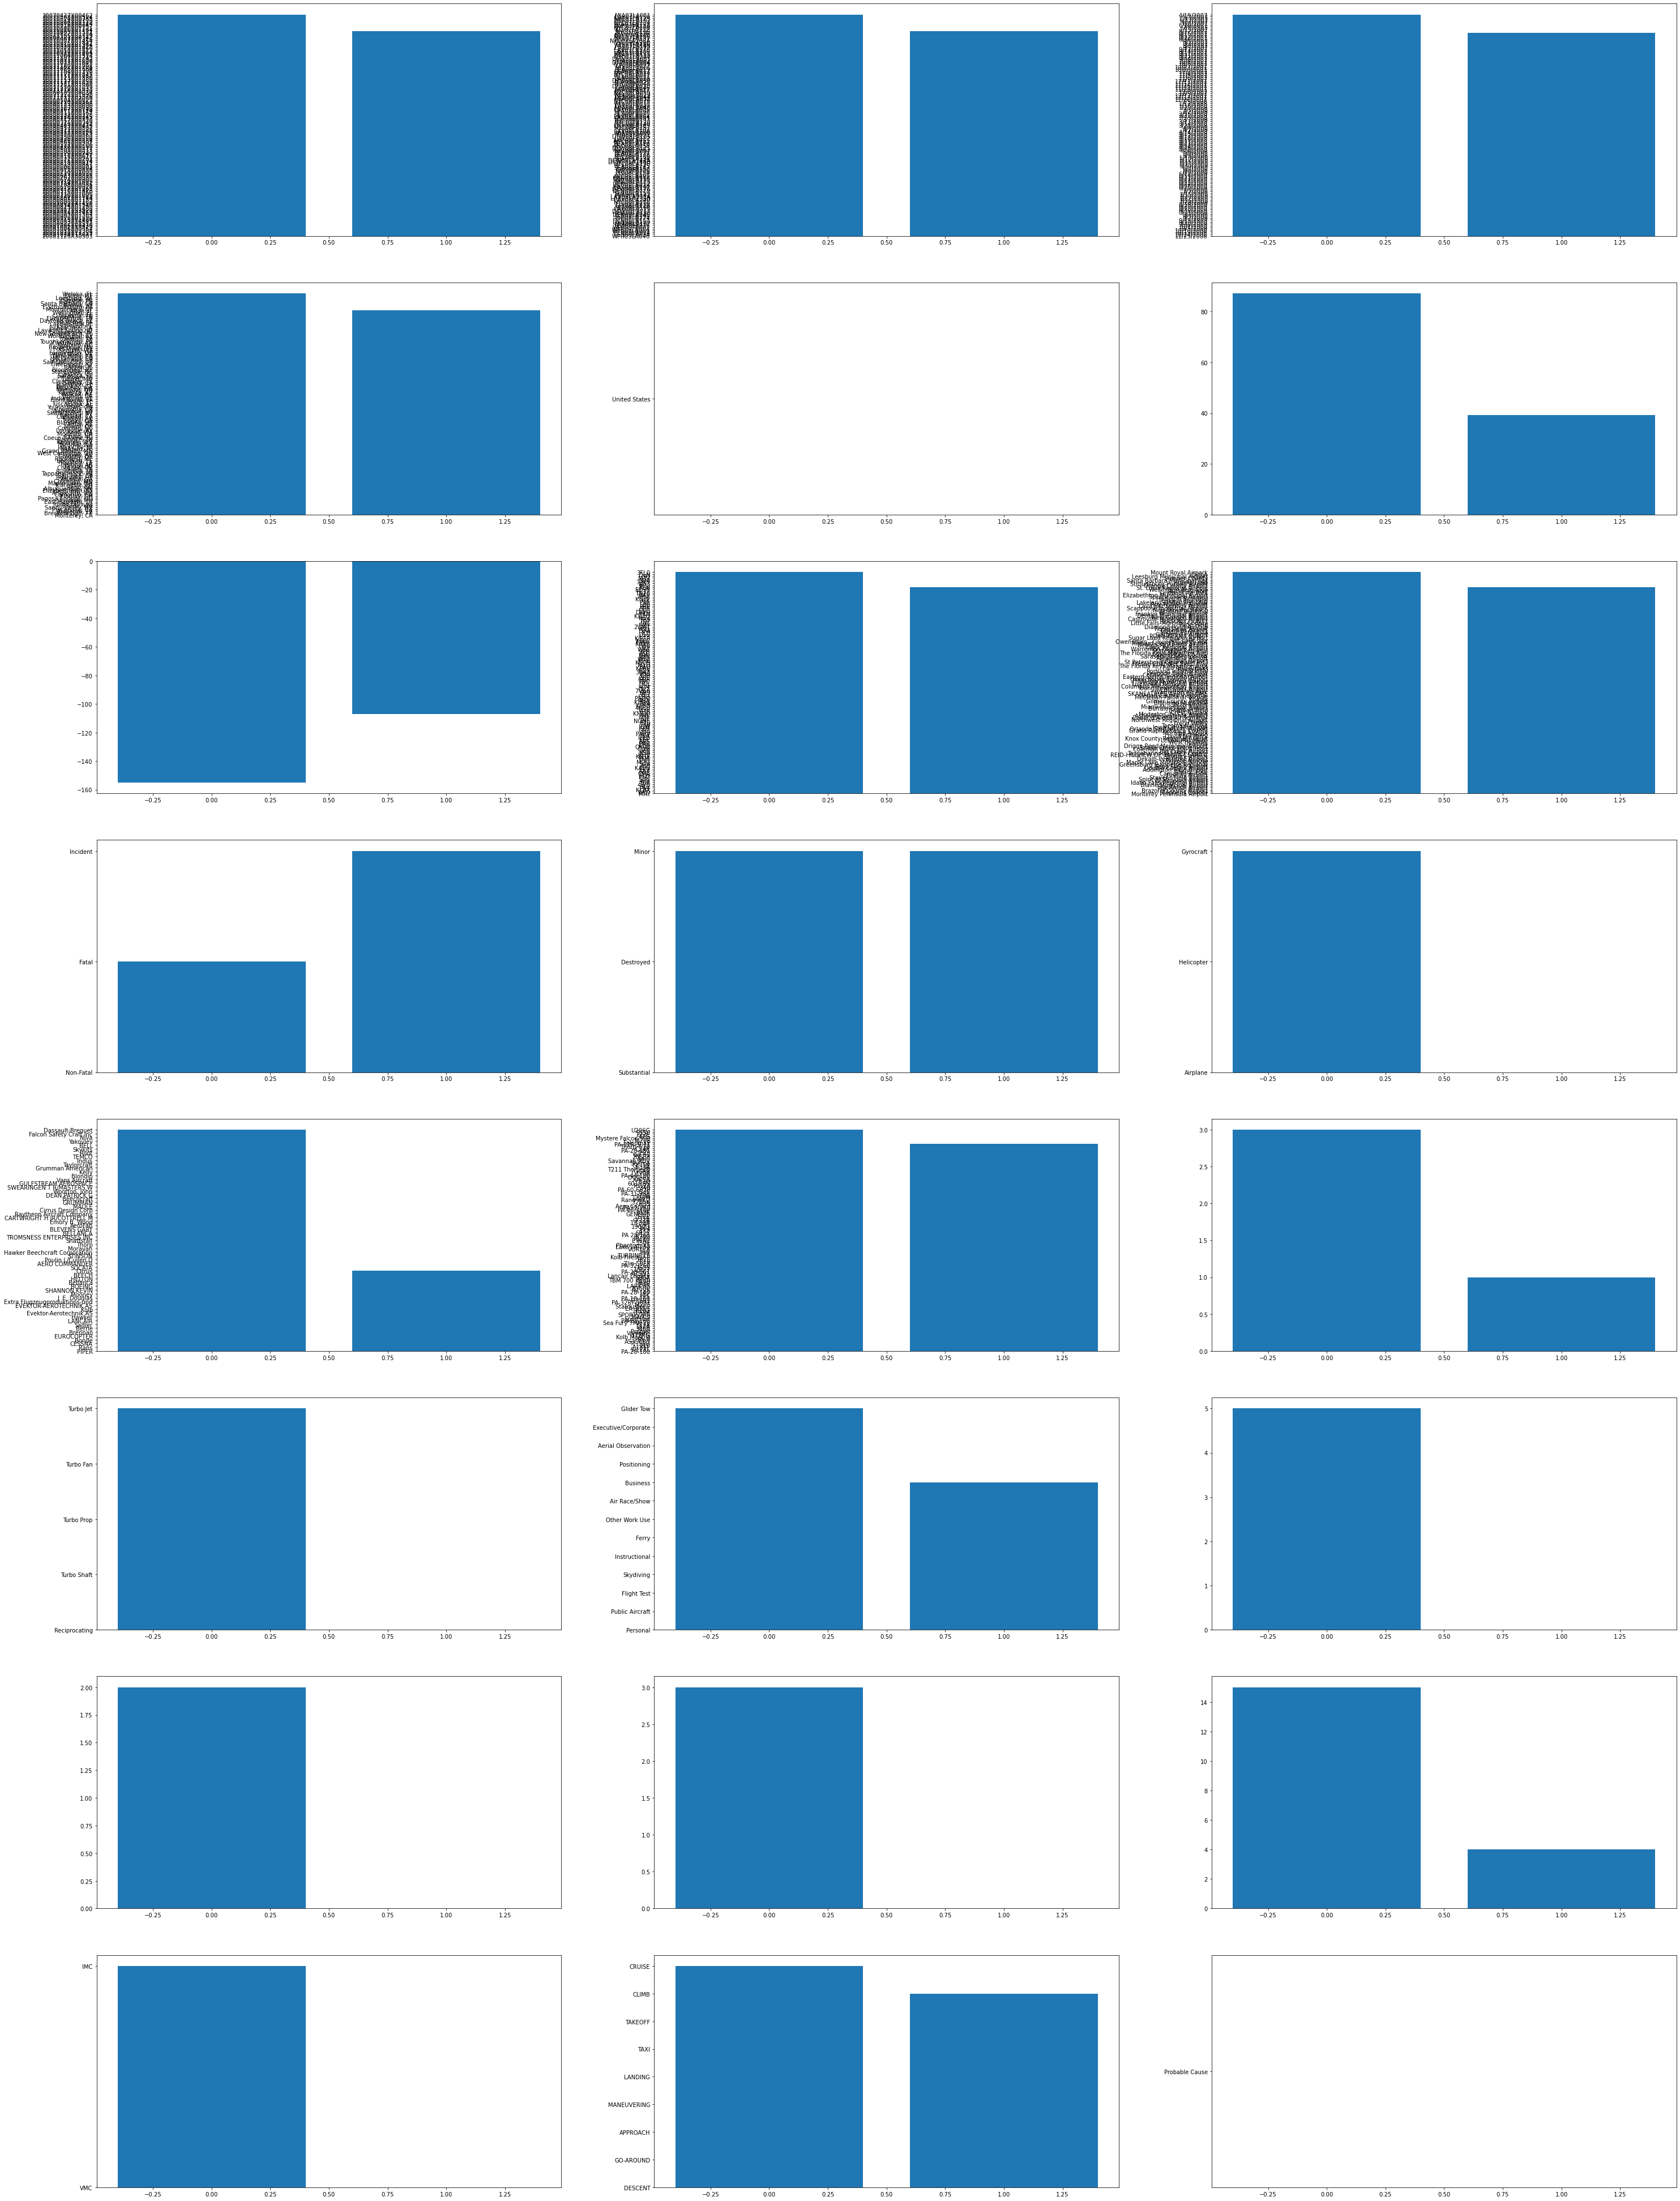

In [15]:
fig = plt.figure(figsize=(50, 80))
i = int(1)
for column in data_df:
    ax = fig.add_subplot(9, 3, i)
    i=i+1
#     x = data_df[column].tolist()
    plt.bar(final_target, data_df[column])

##### Encoding the values

In [6]:
# Define the input value columns(also called as X)
data = data_df[[
                'Injury_Severity', 'Aircraft_Damage', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                ]]

# Display data DF
data

,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Non-Fatal,Substantial,0.0,1.0,1.0,0.0
1,Non-Fatal,Destroyed,0.0,2.0,0.0,0.0
2,Non-Fatal,Substantial,0.0,0.0,0.0,1.0
3,Non-Fatal,Substantial,0.0,0.0,0.0,2.0
4,Fatal,Substantial,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
118,Non-Fatal,Substantial,0.0,2.0,2.0,0.0
119,Fatal,Substantial,1.0,0.0,0.0,0.0
120,Non-Fatal,Substantial,0.0,0.0,1.0,0.0
121,Fatal,Destroyed,2.0,0.0,0.0,0.0


In [7]:
# List of column names which has string values
col_list = ['Injury_Severity', 'Aircraft_Damage']

# Iterate through each column in col_list and create a encoded values for that column
for col in col_list:
    # Get the list of unique values from column
    unique = list(data[col].unique())
    
    # Create a LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Store the encoder in unique variable depending on the column name
    if col == 'Injury_Severity':
        le_Injury_Severity = encoder
        
    elif col == 'Aircraft_Damage':
        le_Aircraft_Damage = encoder
      
    # Fit the encoder on unique values    
    encoder.fit(unique)
    
    # Get the column values to list
    col_data_list = data[col].tolist()
    
    # Transform column values to encoded form
    ecoded_list = list(encoder.transform(col_data_list))
    
    # Add encoded values as new column in df
    new_col_name = col+'_Encoded'
    data[new_col_name] = ecoded_list

C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [8]:
# Display DF
data

,Injury_Severity,Aircraft_Damage,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Injury_Severity_Encoded,Aircraft_Damage_Encoded
0,Non-Fatal,Substantial,0.0,1.0,1.0,0.0,2,2
1,Non-Fatal,Destroyed,0.0,2.0,0.0,0.0,2,0
2,Non-Fatal,Substantial,0.0,0.0,0.0,1.0,2,2
3,Non-Fatal,Substantial,0.0,0.0,0.0,2.0,2,2
4,Fatal,Substantial,1.0,0.0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...
118,Non-Fatal,Substantial,0.0,2.0,2.0,0.0,2,2
119,Fatal,Substantial,1.0,0.0,0.0,0.0,0,2
120,Non-Fatal,Substantial,0.0,0.0,1.0,0.0,2,2
121,Fatal,Destroyed,2.0,0.0,0.0,0.0,0,0


In [9]:
# Creating final_data df with only required(Numeric value) columns 
final_data = data[[
                   'Injury_Severity_Encoded', 'Aircraft_Damage_Encoded', 'Total_Fatal_Injuries',
                   'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                  ]]

# Display Final Data
final_data

,Injury_Severity_Encoded,Aircraft_Damage_Encoded,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,2,2,0.0,1.0,1.0,0.0
1,2,0,0.0,2.0,0.0,0.0
2,2,2,0.0,0.0,0.0,1.0
3,2,2,0.0,0.0,0.0,2.0
4,0,2,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
118,2,2,0.0,2.0,2.0,0.0
119,0,2,1.0,0.0,0.0,0.0
120,2,2,0.0,0.0,1.0,0.0
121,0,0,2.0,0.0,0.0,0.0


In [10]:
# Define feature_names to get the important features
feature_names = ['Injury_Severity_Encoded', 'Aircraft_Damage_Encoded',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured']
# final_data.columns

# Display feature names
feature_names

['Injury_Severity_Encoded',
 'Aircraft_Damage_Encoded',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured']

##### Logistic_Regression 

In [10]:
# Perform train test split for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=42)

In [11]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform X values (Train & Test) with the scalar
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9891304347826086
Testing Data Score: 0.9354838709677419


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
# Run Prediction in test data to get the predicted values for y(target)
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Accident' 'Accident' 'Accident' 'Accident' 'Accident' 'Accident'
 'Accident' 'Accident' 'Accident' 'Accident']
First 10 Actual labels: ['Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident', 'Accident']


In [14]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Accident,Accident
1,Accident,Accident
2,Accident,Accident
3,Accident,Accident
4,Accident,Accident
5,Accident,Accident
6,Accident,Accident
7,Accident,Accident
8,Accident,Accident
9,Accident,Accident


In [15]:
# Display Confusion Matrix 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[29  0]
 [ 2  0]]
Classification Report:
              precision    recall  f1-score   support

    Accident       0.94      1.00      0.97        29
    Incident       0.00      0.00      0.00         2

   micro avg       0.94      0.94      0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31

Accuracy: 0.9354838709677419


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
# # For plotting graph need to use the encoded values. 
# # For actual values we have final_target already encoded.

# # For y_pred, encode using same encoder which was used to encode actual values.
# encoded_yPred_list = list(target_encoder.transform(y_pred))
# encoded_yPred_df = pd.DataFrame({"encoded_y_Pred" : encoded_yPred_list})
# encoded_yPred = encoded_yPred_df["encoded_y_Pred"]

# # print(final_target)
# # print(encoded_yPred)

# plt.figure(figsize=(5, 7))

# ax = sns.distplot(final_target, hist=False, color="r", label="Actual Value")
# sns.distplot(encoded_yPred, hist=False, color="b", label="Fitted Values" , ax=ax)


# plt.title('Actual vs Fitted Values for Price')


# plt.show()

##### Random Forest Regression

In [17]:
# Perform train test split for random forest regression
from sklearn.model_selection import train_test_split
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(final_data, final_target, random_state=42)

In [18]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler_random = StandardScaler().fit(X_train_random)

# Transform X values (Train & Test) with the scalar
X_train_random_scaled = X_scaler_random.transform(X_train_random)
X_test_random_scaled = X_scaler_random.transform(X_test_random)


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_random_scaled, y_train_random)

print(f"Testing Data Score: {rf.score(X_test_random, y_test_random)}")
print(f"Training Data Score: {rf.score(X_train_random, y_train_random)}")

Testing Data Score: 0.9354838709677419
Training Data Score: 0.9891304347826086


In [20]:
#Run Prediction in test data to get the predicted values for y(target)
y_pred_random = list(rf.predict(X_test_random))
print(f"First 10 Predictions:   {y_pred_random[:10]}")
print(f"First 10 Actual labels: {y_test_random[:10].tolist()}")

First 10 Predictions:   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred_random, "Actual": y_test_random}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [22]:
# Display Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:")
print(result_random)
result1_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:",)
print (result1_random)
result2_random = accuracy_score(y_test_random, y_pred_random)
print("Accuracy:",result2_random)

Confusion Matrix:
[[29  0]
 [ 2  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       0.00      0.00      0.00         2

   micro avg       0.94      0.94      0.94        31
   macro avg       0.47      0.50      0.48        31
weighted avg       0.88      0.94      0.90        31

Accuracy: 0.9354838709677419


C:\Users\subha\Anaconda3\envs\PythonAdv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
# Display Feature names
print(feature_names)

['Injury_Severity_Encoded', 'Aircraft_Damage_Encoded', 'Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']


In [24]:
# Get the Important features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2718361145767688, 'Injury_Severity_Encoded'),
 (0.14307215065409637, 'Aircraft_Damage_Encoded'),
 (0.1311880562183528, 'Total_Uninjured'),
 (0.06116004864809321, 'Total_Fatal_Injuries'),
 (0.007613806092917278, 'Total_Serious_Injuries'),
 (0.00012982380977139232, 'Total_Minor_Injuries')]

In [25]:
# !pip install --upgrade scikit-learn==0.20.3

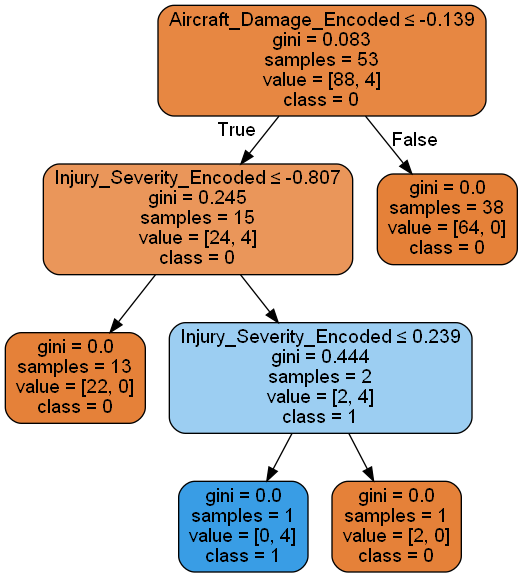

In [32]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

export_graphviz(rf.estimators_[100], out_file=dot_data,
      filled=True, rounded=True,
      special_characters=True,feature_names = feature_names,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Accident_type_Tree.png')
Image(graph.create_png())

In [ ]:
# # For plotting graph need to use the encoded values. 
# # For actual values we have final_target already encoded.

# # # For y_pred, encode using same encoder which was used to encode actual values.
# # encoded_yPred_list = list(target_encoder.transform(y_pred))
# # encoded_yPred_df = pd.DataFrame({"encoded_y_Pred" : encoded_yPred_list})
# # encoded_yPred = encoded_yPred_df["encoded_y_Pred"]

# # print(final_target)
# # print(encoded_yPred)

# plt.figure(figsize=(5, 7))

# ax = sns.distplot(final_target, hist=False, color="r", label="Actual Value")
# sns.distplot(y_pred_random, hist=False, color="b", label="Fitted Values" , ax=ax)


# plt.title('Actual vs Fitted Values for Price')


# plt.show()

##### Data Set with Unknowns

In [ ]:
# Read CSV
data_df = pd.read_csv('Data\Final_Clean_AviationData_US.csv')

# Display DF
data_df

In [ ]:
# Define target (Also called as Y)
target = data_df["Investigation_Type"]
target.head()

In [ ]:
#  Encode Target values for Random Forest Model

## Get the unique list of Investigation_type
unique_target = list(data_df["Investigation_Type"].unique())

# Create an encoder and fit on unoque values
target_encoder = preprocessing.LabelEncoder()
target_encoder.fit(unique_target)

# Transform all target values with encoder and store as list
ecoded_target_list = list(target_encoder.transform(target))

# Create a final_target with encoded values
encoded_target_df = pd.DataFrame({"Investigation_Type" : ecoded_target_list})
final_target = encoded_target_df["Investigation_Type"]
final_target

In [ ]:
# Define the input value columns(also called as X)

data = data_df[[
                'Injury_Severity', 'Aircraft_Damage', 'Total_Fatal_Injuries',
                'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                ]]

# Display data DF
data

In [ ]:
# List of column names which has string values
col_list = ['Injury_Severity', 'Aircraft_Damage']

# Iterate through each column in col_list and create a encoded values for that column
for col in col_list:
    # Get the list of unique values from column
    unique = list(data[col].unique())
    
    # Create a LabelEncoder
    encoder = preprocessing.LabelEncoder()
    
    # Store the encoder in unique variable depending on the column name
    if col == 'Injury_Severity':
        le_Injury_Severity = encoder
        
    elif col == 'Aircraft_Damage':
        le_Aircraft_Damage = encoder
      
    # Fit the encoder on unique values    
    encoder.fit(unique)
    
    # Get the column values to list
    col_data_list = data[col].tolist()
    
    # Transform column values to encoded form
    ecoded_list = list(encoder.transform(col_data_list))
    
    # Add encoded values as new column in df
    new_col_name = col+'_Encoded'
    data[new_col_name] = ecoded_list

In [ ]:
# Display DF
data

In [ ]:
# Creating final_data df with only required(Numeric value) columns 
final_data = data[[
                   'Injury_Severity_Encoded', 'Aircraft_Damage_Encoded', 'Total_Fatal_Injuries',
                   'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured'
                  ]]

# Display Final Data
final_data

In [ ]:
# Define feature_names to get the important features
feature_names = final_data.columns

# Display feature names
feature_names

##### Logistic_Regression 

In [ ]:
# Perform train test split for logistic regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_data, target, random_state=42)

In [ ]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

# Transform X values (Train & Test) with the scalar
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [ ]:
# Run Prediction in test data to get the predicted values for y(target)
y_pred = classifier.predict(X_test)
print(f"First 10 Predictions:   {y_pred[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

In [ ]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

In [ ]:
# Display Confusion Matrix 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test, y_pred)
print("Accuracy:",result2)

##### Random Forest Regression

In [ ]:
# Perform train test split for random forest regression
from sklearn.model_selection import train_test_split
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(final_data, final_target, random_state=42)

In [ ]:
# Scale data using StandardScalar
from sklearn.preprocessing import StandardScaler
X_scaler_random = StandardScaler().fit(X_train_random)

# Transform X values (Train & Test) with the scalar
X_train_random_scaled = X_scaler_random.transform(X_train_random)
X_test_random_scaled = X_scaler_random.transform(X_test_random)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_random_scaled, y_train_random)

print(f"Testing Data Score: {rf.score(X_test_random, y_test_random)}")
print(f"Training Data Score: {rf.score(X_train_random, y_train_random)}")

In [ ]:
#Run Prediction in test data to get the predicted values for y(target)
y_pred_random = list(rf.predict(X_test_random))
print(f"First 10 Predictions:   {y_pred_random[:10]}")
print(f"First 10 Actual labels: {y_test_random[:10].tolist()}")

In [ ]:
# Create df with predicted and actual values
pd.DataFrame({"Prediction": y_pred_random, "Actual": y_test_random}).reset_index(drop=True)

In [ ]:
# Display Confusion Matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:")
print(result_random)
result1_random = classification_report(y_test_random, y_pred_random)
print("Classification Report:",)
print (result1_random)
result2_random = accuracy_score(y_test_random, y_pred_random)
print("Accuracy:",result2_random)

In [ ]:
# Display Feature names
print(feature_names)

In [ ]:
# Get the Important features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)